## <center> √âcole Polytechnique de Montr√©al <br> D√©partement G√©nie Informatique et G√©nie Logiciel <br>  INF8460 ‚Äì Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 - Les LLMs et la g√©n√©ration augment√©e de r√©cup√©ration (RAG) pour les questions-r√©ponses<br> Automne 2024 </center>


## Identification de l'√©quipe:

### Groupe de laboratoire:

### Equipe num√©ro :

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: D√©crivez bri√®vement ce qui a √©t√© fait par chaque membre de l‚Äô√©quipe. Tous les membres sont cens√©s contribuer au d√©veloppement. Bien que chaque membre puisse effectuer diff√©rentes t√¢ches, vous devez vous efforcer d‚Äôobtenir une r√©partition √©gale du travail. Soyez pr√©cis ! N'indiquez pas seulement : travail r√©parti √©quitablement

## 1. Introduction

### 1.1. Description du TP4

Dans ce TP, vous allez travailler sur un syst√®me de **g√©n√©ration augment√©e de r√©cup√©ration**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des mod√®les de langue g√©n√©ratifs et de recherche d'information.

√âtant donn√©e une question, il faudra retrouver les passages les plus pertinents  avec un mod√®le de recherche. Ensuite, il faudra g√©n√©rer une r√©ponse √† la question en utilisant ces passages de texte. Vous aurez finalement √† trouver des mani√®res d'am√©liorer les performances de votre mod√®le RAG.

L'ensemble est not√© sur 100 points.

### Description des donn√©es

Les passages donn√©s sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les math√©matiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En g√©n√©ral, les textes abordent des sujets tr√®s sp√©cifiques reli√©s √† un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, √† leur mani√®re, la notion de m√©moire. Parmi ces 100 passages, 5 pourraient aborder la m√©moire dans un processeur sp√©cifique.

En ce qui concerne les questions, elles sont bas√©es sur les sujets de certains textes pr√©cis et on peut y r√©pondre √† l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont n√©cessaires pour r√©pondre √† la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait n√©cessiter l'information de tous ces textes pour trouver la r√©ponse. 
Les questions ont √©t√© cr√©√©es pour faire en sorte que les r√©ponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).


Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / r√©ponses dans le jeu d'entra√Ænement et ~ 500 dans le jeu de validation. Vous devez pr√©dire 500 r√©ponses aux questions du jeu de test.

### Exemple

Par exemple, pour la question

> What type of bonds are used to form branches in glycogen?

Avec l'approche RAG, plut√¥t que de g√©n√©rer la r√©ponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :

> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by Œ±-1,4-glycosidic bonds, with branches formed off the chain via Œ±-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.

Puis on g√©n√®re une r√©ponse conditionn√©e par les passages pertinents :

> Œ±-1,6-glycosidic bonds

### Motivation

Le RAG est une approche tr√®s populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les r√©ponses g√©n√©r√©es, ce qui peut √™tre utile pour la v√©rification de faits ou pour contr√¥ler les hallucinations. De plus, elle permet d'int√©grer des connaissances externes et r√©centes dans les mod√®les de g√©n√©ration sans avoir √† les r√©-entra√Æner.

### Objectif du TP

Dans ce TP, vous impl√©menterez plusieurs syst√®mes de question-r√©ponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le mod√®le de g√©n√©ration. Puis vous impl√©menterez un syst√®me fig√© qui utilise un mod√®le de plongements fig√© pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donn√©s √† un mod√®le de g√©n√©ration fig√© aussi.

Enfin, vous impl√©menterez votre propre m√©thode dans l'objectif d'atteindre les meilleures performances dans la comp√©tition Kaggle.

### Jeux de donn√©es

Vous avez 4 fichiers √† votre disposition :
- 'rag_texts.csv' : le corpus de passages extraits de Wikip√©dia.
  - **id** : l'identifiant unique du passage.
  - **text** : le texte du passage.
- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entra√Ænement, de validation et de test.
  - **id** : l'identifiant unique de la question.
  - **question** : La question.
  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.
  - **answer** (sauf pour le fichier de test) : la r√©ponse √† la question.

### Contraintes

- **Mod√®le g√©n√©ratif** : pour des raisons d'√©quit√©, le seul mod√®le de g√©n√©ration que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les diff√©rentes approches et d'√©viter que la performance soit uniquement due √† un mod√®le de g√©n√©ration plus performant.
- Donn√©es externes : vous ne pouvez pas utiliser de donn√©es externes pour entra√Æner vos mod√®les, seulement les donn√©es fournies.
- Mod√®les de plongements √† utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises

Vous pouvez utiliser les librairies suivantes
- Numpy
- Pandas
- HuggingFace
- nltk
- SpaCy
- PyTorch
- faiss
- Langchain
- re


- Pour toute autre librairie, demandez √† votre charg√© de laboratoire

### 1.3. Infrastructure

- Vous avez acc√®s aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l‚Äôenvironnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise

### √âch√©ance

Fin de la session. La date pr√©cise sera indiqu√©e dans les boites de remise sur Moodle.


### Livrables

Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les num√©ros de questions avec vos r√©ponses dans le pdf gr√¢ce √† l'outil que fournit Gradescope.


### Crit√®res
1. Implantation correcte et efficace
2. Richesse de la solution propos√©e
3. Qualit√© du code (noms significatifs, structure, performance, gestion d‚Äôexception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. √âtat de l'art synth√©tis√©
7. Performance attendue des mod√®les
8. R√©ponses correctes/sens√©es aux questions de r√©flexion ou d'analyse

### CODE D‚ÄôHONNEUR
- __R√®gle 1__:  Le plagiat de code est bien √©videmment interdit. Toute utilisation de code doit √™tre r√©f√©renc√©e ad√©quatement. L‚Äôutilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code √©crit par quelqu‚Äôun d‚Äôautre.
- __R√®gle 2__: Vous √™tes libres de discuter des id√©es et des d√©tails de mise en ≈ìuvre avec d'autres √©quipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre √©quipe INF8460, ou incorporer leur code dans votre TP.
- __R√®gle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un d√©p√¥t GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle

La comp√©tion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.

Vous devez recr√©er des √©quipes de 3 personnes sur Kaggle avec le m√™me nom d'√©quipe que sur Moodle ainsi que les m√™mes membres.

Le TP4 se fera sous forme d‚Äôune comp√©tition Kaggle.  Vous devrez utiliser l‚Äôenvironnement Kaggle pour la soumission et l‚Äô√©valuation de vos meilleurs mod√®les.  
Pour tester votre mod√®le au fur et √† mesure, vous aurez le droit √† 4 soumissions par jour sur Kaggle. Il y aura deux types de r√©sultats : votre ¬´ private leaderboard ¬ª et votre ¬´ public leaderboard ¬ª :
- Le ¬´ public leaderboard ¬ª est calcul√© sur approximativement 30% des donn√©es de test, choisies al√©atoirement par Kaggle. Ce score est public et est calcul√© sur la m√™me tranche de donn√©es pour tous les participants.
- Le ¬´ private leaderboard ¬ª est calcul√© sur approximativement 70% des donn√©es de test et n‚Äôest visible qu‚Äô√† la fin de la comp√©tition. Le r√©sultat final sera bas√© sur ce leaderboard. Si aucune soumission n‚Äôest choisie, la soumission avec le meilleur score sur le ¬´ public leaderboard ¬ª sera utilis√©e pour calculer le score sur le ¬´ private leaderboard ¬ª.

Pour l‚Äô√©valuation, vous devrez soumettre un fichier de donn√©es _tp4_submission.csv_ du m√™me format que le fichier _sample_submission.csv_ (disponible sur le site de la comp√©tition et Moodle).


### 1.6. Description des donn√©es et m√©triques d‚Äô√©valuation

Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre √† l'identifiant unique de la question et la colonne _answer_ doit correspondre √† la r√©ponse g√©n√©r√©e par votre mod√®le.

Nous utiliserons la m√©trique **BLEU**, vue en cours, pour √©valuer les r√©ponses g√©n√©r√©es par rapport au jeu de r√©f√©rence (gold standard).

In [20]:
# Import des librairies

import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Optional
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from nltk.translate.bleu_score import sentence_bleu
import nltk
import faiss

In [2]:
# Si vous stockez vos donn√©es sur Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
root_path = './'
data_path = root_path + 'data/'

## 2. Analyse exploratoire et mod√®le de g√©n√©ration simple (15 points)

Pour commencer ce TP, et pour fixer des mod√®les de base (baselines), vous allez utiliser un mod√®le de g√©n√©ration simple pour r√©pondre aux questions. Vous utiliserez le mod√®le de g√©n√©ration **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement g√©n√©rer des r√©ponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le mod√®le.

### 2.1. Chargement des donn√©es (5 points)

#### 2.1.1 Taille des donn√©es (1 point)

Affichez la taille de tous les jeux de donn√©es et quelques questions de l'ensemble d'entra√Ænement

In [22]:
# TODO

questions_test = pd.read_csv(data_path + 'questions_test.csv')
questions_train = pd.read_csv(data_path + 'questions_train.csv')
questions_val = pd.read_csv(data_path + 'questions_val.csv')
texts = pd.read_csv(data_path + 'texts.csv')

print(f"Taille du jeu d'entrainement : {len(questions_train)} \nTaille du jeu de validation : {len(questions_val)} \nTaille du jeu de test  :{len(questions_test)}\n")

print("Quelques questions de l'ensemble d'entrainement :")
questions_train['question'].head()

# END TODO

Taille du jeu d'entrainement : 1747 
Taille du jeu de validation : 500 
Taille du jeu de test  :500

Quelques questions de l'ensemble d'entrainement :


0    What type of insects are vectors for the Haemo...
1    What is the basis of the security of the BBS a...
2    What is the purpose of the catalase test in ba...
3    What type of cells clear small particles in ve...
4    What information is needed to decrypt a messag...
Name: question, dtype: object

#### 2.1.2 Analyse exploratoire (4 points)

a) Sur l'ensemble d'entra√Ænement, affichez :
- Le nombre moyen de mots dans une question
- Le nombre moyen de mots dans une r√©ponse
- Le nombre moyen de passages n√©cessaires pour r√©pondre √† une question
- Le nombre minimal de passages n√©cessaires pour r√©pondre √† une question
- Le nombre maximal de passages n√©cessaires pour r√©pondre √† une question


In [5]:
# TODO

data_question_word_count = questions_train['question'].apply(lambda x: len(x.split()))
mean_words_q = round(np.mean(data_question_word_count), 2)


data_answer_word_count = questions_train['answer'].apply(lambda x: len(x.split()))
mean_words_r = round(np.mean(data_answer_word_count), 2)

mean_passages = round(np.mean(questions_train['text_ids'].apply(lambda x: len(x.split()))),2)
min_passages = np.min(questions_train['text_ids'].apply(lambda x: len(x.split())))
max_passages = np.max(questions_train['text_ids'].apply(lambda x: len(x.split())))

print(f"Le nombre moyen de mots dans une question : {mean_words_q}\n"
      f"Le nombre moyen de mots dans une r√©ponse : {mean_words_r}\n"
      f"Le nombre moyen de passages n√©cessaires pour r√©pondre √† une question : {mean_passages}\n"
      f"Le nombre minimal de passages n√©cessaires pour r√©pondre √† une question : {min_passages}\n"
      f"Le nombre maximal de passages n√©cessaires pour r√©pondre √† une question : {max_passages}\n")

# END TODO

Le nombre moyen de mots dans une question : 10.37
Le nombre moyen de mots dans une r√©ponse : 6.08
Le nombre moyen de passages n√©cessaires pour r√©pondre √† une question : 2.84
Le nombre minimal de passages n√©cessaires pour r√©pondre √† une question : 2
Le nombre maximal de passages n√©cessaires pour r√©pondre √† une question : 4



b) De plus, affichez des histogrammes d√©crivant la distribution du nombre de mots des questions, des r√©ponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos r√©sultats.

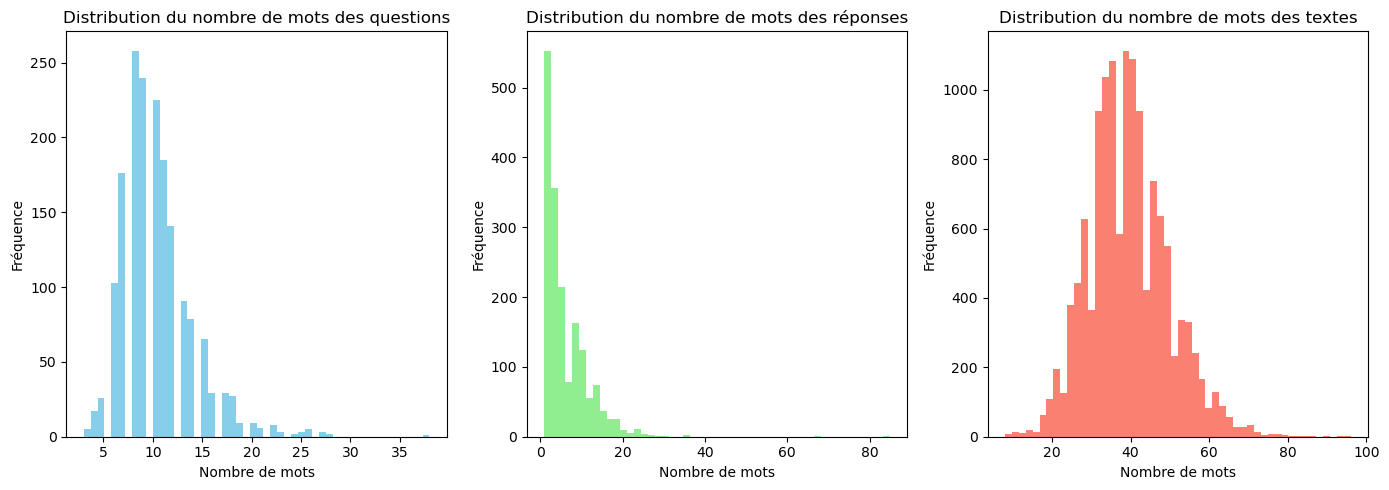

In [6]:
# TODO

texts_world_count = texts['text'].apply(lambda x: len(x.split()))
bins = 50

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(data_question_word_count, bins=bins, color='skyblue')
plt.title('Distribution du nombre de mots des questions')
plt.xlabel('Nombre de mots')
plt.ylabel('Fr√©quence')

plt.subplot(1, 3, 2)
plt.hist(data_answer_word_count, bins=bins, color='lightgreen')
plt.title('Distribution du nombre de mots des r√©ponses')
plt.xlabel('Nombre de mots')
plt.ylabel('Fr√©quence')

plt.subplot(1, 3, 3)
plt.hist(texts_world_count, bins=bins, color='salmon')
plt.title('Distribution du nombre de mots des textes')
plt.xlabel('Nombre de mots')
plt.ylabel('Fr√©quence')

plt.tight_layout()
plt.show()

# TODO

COMMENTAIRE: 

### 2.2. Chargement du mod√®le et g√©n√©ration des r√©ponses (5 points)

Nous allons maintenant √©valuer la performance d'un mod√®le de langue √† r√©pondre aux questions de l'ensemble de validation. Chargez d'abord le mod√®le **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et g√©n√©rez les r√©ponses du mod√®le √† partir de la question. G√©n√©rez au maximum 32 nouveaux jetons.

In [23]:
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = 'microsoft/Phi-3-mini-128k-instruct'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained( 
    "microsoft/Phi-3-mini-128k-instruct",  
    device_map=DEVICE,  
    torch_dtype=torch.float16,  
    trust_remote_code=True,  
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [21]:
# # Question de l'utilisateur
# input_question = 'What is the capital of Vietnam ?'

# # Pr√©parer les entr√©es pour le mod√®le
# input_template = tokenizer.apply_chat_template([
#     {'role': 'system', 'content': 'You are a helpful assistant.'},
#     {'role': 'user', 'content': input_question}
# ], tokenize=False, add_generation_prompt=True)
# print(input_template)

# inputs = tokenizer(input_template, return_tensors="pt")
# max_length = tokenizer(input_template, return_tensors="pt")["input_ids"].shape[1] + 32

# inputs = {key: value.to(DEVICE) for key, value in inputs.items()}

# # G√©n√©rer la r√©ponse
# # outputs = model.generate(**inputs, max_length=max_length)
# # outputs = model.generate(**inputs, max_length=max_length, num_beams=5, no_repeat_ngram_size=2)
# # outputs = model.generate(**inputs, max_length=max_length, do_sample=True, top_p=0.95, temperature=0.7)
# outputs = model.generate(**inputs, max_length=max_length, do_sample=True, top_k=50)

# # D√©coder et afficher la r√©ponse
# response = tokenizer.decode(outputs[0], skip_special_tokens=True)
# print(response.split(input_question)[-1].strip())

In [25]:
generated_responses = []
for index, row in questions_val.iterrows():
    input_question = row['question']

    inputs = tokenizer.apply_chat_template([
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {'role': 'user', 'content': input_question}
    ], add_generation_prompt=True, return_tensors="pt").to(DEVICE)

    outputs = model.generate(inputs, max_new_tokens=32)

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    generated_response = response.split(input_question)[-1].strip()
    generated_responses.append(generated_response)

df_true = questions_val[['id', 'answer']].copy()
df_pred = questions_val[['id']].copy()
df_pred['answer'] = generated_responses

In [ ]:
questions_val_test = pd.read_csv(data_path + 'questions_val_test.csv')
questions = questions_val['question'].tolist()

generated_responses = []

inputs = tokenizer.apply_chat_template(
    [
        [{'role': 'system', 'content': 'You are a helpful assistant.'},
         {'role': 'user', 'content': question}]
        for question in questions
    ],
    add_generation_prompt=True,
    return_tensors="pt",
    padding=True
).to(DEVICE)

outputs = model.generate(
    inputs, 
    max_new_tokens=32
)

for question, output in zip(questions, outputs):
    response = tokenizer.decode(output, skip_special_tokens=True).split(question, 1)[-1].strip()    
    generated_responses.append(response)

df_true = questions_val[['id', 'answer']].copy()
df_pred = questions_val[['id']].copy()
df_pred['answer'] = generated_responses

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
You are not running the flash-attention implementation, expect numerical differences.


OutOfMemoryError: CUDA out of memory. Tried to allocate 422.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 12.85 GiB is allocated by PyTorch, and 1.52 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [9]:
print(generated_responses)

['The M201V variant of CYSLTR2, also known as Cysteinyl leukotriene receptor 2, is', 'Carbapenems and penicillins are both classes of beta-lactam antibiotics, which means they share a common beta-', 'The 8-demicubic honeycomb, also known as the demiocteractic honeycomb, is a uniform tessellation of', 'As of my last update in April 2023, 5F-AMB (5F-alpha-alpha-methyl-N', 'Estrone sulfamate is not directly converted into estrone by 17Œ≤-hydroxysteroid dehydrogenase']


### 2.3. √âvaluation des r√©ponses (3 points)

Compl√©tez la fonction `evaluate_bleu` et utilisez la m√©trique BLEU pour √©valuer les r√©ponses g√©n√©r√©es par rapport aux r√©ponses attendues sur le jeu de validation. √âvaluez votre mod√®le avec les m√©triques BLEU-1 et BLEU-2. BLEU-1 ne consid√®re que les unigrammes pour √©valuer la r√©ponse et BLEU-2 consid√®re les bigrammes aussi. Pour s√©parer une s√©quence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [26]:
import warnings
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):
    """
    √âvalue les r√©ponses g√©n√©r√©es en utilisant la m√©trique BLEU.

    Param√®tres:
    df_true (pd.DataFrame): DataFrame contenant les vraies r√©ponses avec des colonnes 'id' et 'answer'.
    df_pred (pd.DataFrame): DataFrame contenant les r√©ponses pr√©dites avec des colonnes 'id' et 'answer'.
    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes consid√©r√©s pour la m√©trique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)

    Retourne:
    float: Score BLEU moyen sur toutes les entr√©es.
    """
    # TODO

    df_merged = pd.merge(df_true[['id', 'answer']], df_pred[['id', 'answer']], on='id', suffixes=('_true', '_pred'))

    weights = (1.0, 0.0, 0.0, 0.0) if bleu_type == 1 else (0.5, 0.5, 0.0, 0.0)
    
    bleu_scores = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for _, row in df_merged.iterrows():
            reference = row['answer_true'].split()
            candidate = row['answer_pred'].split() 

            bleu_score = sentence_bleu([reference], candidate, weights=weights)
            bleu_scores.append(bleu_score)
        
    mean_bleu = sum(bleu_scores) / len(bleu_scores)
    return mean_bleu

    # END TODO

In [27]:
# TODO
print(f"Le score BLEU-1 est {evaluate_bleu(df_true, df_pred, 1):.3f}.")
print(f"Le score BLEU-2 est {evaluate_bleu(df_true, df_pred, 2):.3f}.")
# TODO

Le score BLEU-1 est 0.073.
Le score BLEU-2 est 0.029.


### 2.4. Commentaire (2 points)

Reportez, puis commentez la performance obtenue ici.

Performance obtenue:

## 3. Approche RAG fig√© (45 points)

Dans cette partie, vous allez impl√©menter une approche simple de RAG fig√©. On dit ici que le mod√®le est fig√© car on ne r√©-entra√Æne aucun mod√®le. Vous impl√©menterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.

Dans la m√©thode d'impl√©mentation du RAG fig√©, vous allez d'abord retrouver les passages pertinents pour chaque question avec un mod√®le de plongements de type Transformers, puis g√©n√©rer une r√©ponse conditionn√©e par ces passages.

Dans cette partie, on utilisera
- le mod√®le de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages
- le mod√®le de g√©n√©ration (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour g√©n√©rer les r√©ponses

### 3.1 RAG fig√© sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)

Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le mod√®le de plongements. Puis, vous devez calculer la similarit√© cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [29]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 32

In [30]:
# TODO
from transformers import AutoTokenizer, AutoModel
model_name = 'BAAI/bge-small-en-v1.5'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.to(DEVICE)
# END TODO

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [31]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE):
    """
    Encode les textes en utilisant le mod√®le pass√© en param√®tre pour g√©n√©rer les plongements des textes

    Param√®tres:
    sequences    : Liste de s√©quence √† transformer en plongements
    tokenizer   : Segmenteur du mod√®le de plongements
    model       : Mod√®le de plongements
    device      : Machine sur laquelle les op√©rations doivent √™tre effectu√©es
    batch_size  : Taille des lots lors de la g√©n√©ration des traitements
    """
    # TODO

    model.eval()

    embeddings = []
    
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i + batch_size]
    
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
        
        with torch.no_grad():
            output = model(**inputs).last_hidden_state # .last_hidden_state : Dimension (torch.Size([batch_size, sequence_length, hidden_size])) -> chaque token de la s√©quence √† un plongement de taille 384 !
            embedding = output.mean(dim=1)  # Moyenne sur la dimension des tokens (dimension sequence_length) pour avoir la repr√©sentation de la s√©quence
            embeddings.append(embedding)
    
    return torch.cat(embeddings, dim=0)

    # END TODO

In [12]:
# TODO
sequences = ["What is the capital of France?", "What is the capital of Vietnam?"]
embeddings = encode_sequences(sequences, tokenizer, model, device='cuda', batch_size=1)
print(embeddings.shape) # Dim (Batch_size,384)
# END TODO

torch.Size([2, 384])


#### 3.1.2 √âvaluation des passages retrouv√©s avec Recall@k et precision@k (7 points)

Maintenant que les passages ont tous √©t√© encod√©s, on peut √©valuer si les passages retrouv√©s sont pertinents. En prenant les $k$ premiers passages, on peut √©valuer si on retrouve les bons passages associ√©s aux questions. C'est un des avantages du syst√®me RAG : on peut √©valuer de fa√ßon ind√©pendante la qualit√© du syst√®me qui retrouve les passages pertinents et de celui qui g√©n√®re les r√©ponses. Cela permet notamment d'√©valuer quels sont les points forts et points faibles du syst√®me.

Pour cela, vous allez utiliser les m√©triques **Precision@k** et **Recall@k** d√©finies dans les √©quations suivantes. Impl√©mentez ces m√©triques.

$$\text{Precision@k} = \frac{\text{Nombre d'√©l√©ments pertinents dans les k premiers}}{k}$$

$$\text{Recall@k} (Rappel@k) = \frac{\text{Nombre d'√©l√©ments pertinents dans les k premiers}}{\text{Nombre total d'√©l√©ments pertinents}}$$


In [51]:
def compute_recall_at_k(ground_truth, predictions):
    """
    Calcule la m√©trique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Param√®tres:
    ground_truth : Liste contenant tous les vrais passages associ√©s aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouv√©s pour chacune des questions formatt√©e de la m√™me mani√®re que `ground_truth`

    Retourne:
    Recall moyen
    """
    # TODO
    total_recall = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):

        true_set = set(true_texts)  
        predicted_set = set(predicted_texts)

        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        recall = len(relevant_and_retrieved) / len(true_set)
        total_recall += recall
   
    average_recall = total_recall / len(ground_truth) 
    return average_recall

    # END TODO

In [50]:
def compute_precision_at_k(ground_truth, predictions):
    """
    Calcule la m√©trique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Param√®tres:
    ground_truth : Liste contenant tous les vrais passages associ√©s aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouv√©s pour chacune des questions formatt√©e de la m√™me mani√®re que `ground_truth`

    Retourne: 
    Pr√©cision moyenne
    """

    # TODO

    total_precision = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):
        true_set = set(true_texts)
        predicted_set = set(predicted_texts)
        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        precision = len(relevant_and_retrieved) / len(predicted_set) 
        total_precision += precision
    
    average_precision = total_precision / len(ground_truth) 
    return average_precision

    # END TODO


#### 3.1.3 R√©sultat d'√©valuation (5 points)
Impl√©mentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarit√© cosinus pour comparer les passages et les questions. √âvaluez ensuite votre mod√®le r√©cup√©rant les passages avec les m√©triques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [34]:
def cosine_similarity(questions_encoded, text_embeddings):
    # Normalisation des embeddings
    questions_normed = questions_encoded / torch.norm(questions_encoded, p=2, dim=1, keepdim=True)
    texts_normed = text_embeddings / torch.norm(text_embeddings, p=2, dim=1, keepdim=True)
    
    # Calcul de la similarit√© cosinus
    cosine_distance = torch.mm(questions_normed, texts_normed.t())
    return cosine_distance

In [ ]:
import torch
import torch.nn.functional as F

def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question pass√©e en param√®tre

    Param√®tres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)
    k               : le nombre de passages √† retourner
    tokenizer       : Segmenteur du mod√®le de plongements
    model           : Mod√®le de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO

    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    # print(question_embeddings.unsqueeze(1)) # Dimension (nb_questions, 1, 384)
    # print(passage_embed.unsqueeze(0)) # Dimension (1, nb_passages, 384)
    # similarities = F.cosine_similarity(question_embeddings.unsqueeze(1), passage_embed.unsqueeze(0), dim=-1) # Dimension  (nb_questions, nb_passages)
    similarities = cosine_similarity(question_embeddings, passage_embed)
    top_k_indices = torch.topk(similarities, k=k, dim=-1).indices.tolist() # Indices du topk des passages (dim=-1) pour une question donn√©e

    return top_k_indices

    # END TODO


In [55]:
# TODO
passages = texts['text'].tolist()
questions = questions_val['question'].tolist()

passage_embed = encode_sequences(passages, tokenizer, model)
# END TODO

In [45]:
print(passage_embed.shape)

torch.Size([13314, 384])


In [46]:
k = 3
top_k_indices = retrieve_passages(questions, passage_embed, k, tokenizer, model)
print(top_k_indices)
print(top_k_indices.shape)

tensor([[10039,  1885,  4270],
        [ 8865,  5333,  2651],
        [11620,  4618, 10382],
        ...,
        [ 2838,  1001,  7523],
        [13016, 10021, 11171],
        [ 1728,  5978,  6130]], device='cuda:0')
torch.Size([500, 3])


#### 3.1.4 Graphique (3 points)
Affichez maintenant un graphique de vos r√©sultats de la question pr√©c√©dente en mettant √† l'axe des x la valeur de $k$ et √† l'axe des y la valeur de la pr√©cision et du rappel. Quel est le nombre optimal de passages √† passer au mod√®le en vous basant sur le recall@k et precision@k ? Pourquoi ?

<class 'int'>
top_ground_truth : [[10039, 314], [8865, 5333], [4618, 11620], [5363, 9353], [12586, 8473], [2327, 5883, 4146], [12254, 10546, 10687], [13153, 13306], [7771, 4245], [2787, 26, 10699, 8395], [2713, 3634, 8701], [11050, 3806], [4117, 12632, 10619, 10518], [10602, 509, 13169], [10027, 8928, 6717], [3014, 2764, 7628], [7309, 9919, 359], [2617, 5152, 8015], [10111, 9971, 3907], [9316, 11830], [8063, 6075], [4108, 6262], [8248, 520], [10094, 4693, 5730, 10125], [6262, 9292], [11373, 10650], [6170, 391, 8451], [9652, 141], [276, 13100, 9299], [11345, 7418, 7262], [7220, 3513], [3235, 9441, 9856, 4817], [3638, 11733, 4366], [6400, 1207, 10221], [13015, 4460], [5698, 6580], [7405, 4027], [4846, 12516], [6337, 6780, 7447, 12764], [9622, 3467, 10195, 296], [2316, 4768], [3040, 2174, 9831], [10298, 6834], [8967, 942], [1424, 7891, 9348], [1274, 7854], [4612, 5241, 11256], [7999, 2624, 2789], [4358, 8186, 12201, 9183], [11145, 2738], [8689, 7573], [2039, 398], [3731, 8700, 6628, 9789]

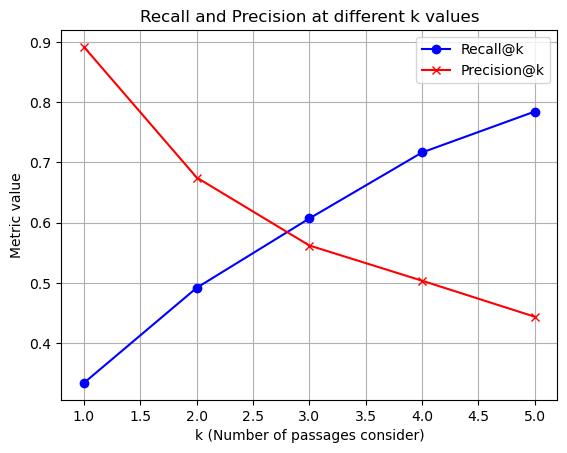

In [ ]:
# TODO
top_ground_truth = questions_val['text_ids'].apply(lambda x: [int(num) for num in x.strip('[]').split()]).to_list()
print(type(top_ground_truth[0][0]))

recall  = []
precision = []
for k in range(1,6) : 
    top_passages = retrieve_passages(questions, passage_embed, k, tokenizer, model)
    recall.append(compute_recall_at_k(top_ground_truth, top_passages))
    precision.append(compute_precision_at_k(top_ground_truth, top_passages))


plt.plot(range(1,6), recall, marker='o', color='b', label='Recall@k')
plt.plot(range(1,6), precision, marker='x', color='r', label='Precision@k')
plt.xlabel('k (Number of passages consider)')
plt.ylabel('Metric value')
plt.title('Recall and Precision at different k values')
plt.legend()
plt.grid(True)
plt.show()

# END TODO

### 3.2 RAG fig√© avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.

[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une biblioth√®que open-source d√©velopp√©e par Meta pour la recherche de similarit√© rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimis√©e pour g√©rer de grands volumes de donn√©es en haute dimension et peut √™tre acc√©l√©r√©e avec des GPU. FAISS est largement utilis√©e pour des syst√®mes de recommandation ou la recherche d'information √† grande √©chelle. Pour plus de d√©tails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)

Utilisez les plongements des passages g√©n√©r√©s au niveau de la question 3.1.1 et indexez-les avec FAISS. V√©rifiez que le nombre de plongements dans l'objet FAISS est bien le m√™me que le nombre de passages. N'oubliez pas qu'on veut une indexation bas√©e sur la similarit√© cosinus.

In [57]:
# TODO
passage_embeddings = passage_embed.cpu().numpy()

faiss.normalize_L2(passage_embeddings) #  normalisation des vecteurs pour l'approche similarit√© cosinus
d = passage_embeddings.shape[1]
index = faiss.IndexFlatIP(d)  # index Faiss bas√© sur le produit "scalaire" -> la recherche donnera les k documents les plus similaires bas√© sur le produit scalaire entre le vecteur d'entr√©e et les vecteurs de passage_embeddings
index.add(passage_embeddings)

assert index.ntotal == passage_embeddings.shape[0], "Le nombre de plongements dans l'objet FAISS n'est pas le m√™me que le nombre de passages."
# END TODO

#### 3.2.2 R√©cup√©ration des passages avec FAISS (4 points)

Impl√©mentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question √† l'aide d'un indexation FAISS


In [58]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question pass√©e en param√®tre

    Param√®tres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    vector_index    : L'objet d'indexation FAISS
    k               : le nombre de passages √† retourner
    tokenizer       : Segmenteur du mod√®le de plongements
    model           : Mod√®le de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO
    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    
    # Normalisation
    question_embeddings = question_embeddings.cpu().numpy()
    faiss.normalize_L2(question_embeddings)
    
    _, top_k_indices = vector_index.search(question_embeddings, k)  # indices de dimension (len(questions), k)
    
    return top_k_indices
    # END TODO

#### 3.2.3 Ex√©cution de FAISS (4 points)

Ex√©cutez maintenant la fonction _"retrieve_passages_faiss"_ pour r√©cup√©rer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [59]:
# TODO
print(retrieve_passages_faiss(questions, index, 3, tokenizer, model))
# END TODO


[[10039  1885  4270]
 [ 8865  5333  2651]
 [11620  4618 10382]
 ...
 [ 2838  1001  7523]
 [13016 10021 11171]
 [ 1728  5978  6130]]


#### 3.2.4 Calculez les m√©triques Precision@K et Rappel@K pour les passages retrouv√©s avec FAISS avec votre k optimal (2 points) 

In [60]:
# TODO
top_passages = retrieve_passages_faiss(questions, index, 3, tokenizer, model)
print(compute_recall_at_k(top_ground_truth, top_passages))
print(compute_precision_at_k(top_ground_truth, top_passages))
# END TODO

0.6069999999999997
0.5619999999999998


#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouv√©s, de temps d'ex√©cution et de tout autre √©l√©ment qui vous semble appropri√© ? (2 points)

> R√©ponse

### 3.3 G√©n√©ration des r√©ponses (5 points)

G√©n√©rez maintenant les r√©ponses des questions sur l'ensemble de validation avec les passages r√©cup√©r√©s. Pour g√©n√©rer les r√©ponses, vous devez concat√©ner les passages pertinents avec la question et donner le tout au mod√®le de g√©n√©ration. Faites-le sur l'ensemble du jeu de validation. Pour la m√©thode, vous avez le choix entre les passages retrouv√©s avec FAISS ou manuellement (avec votre propre impl√©mentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

In [ ]:
# TODO
# G√©n√©rez les prompts
prompts = []
context = {}
for k in range(1,5) : 
    context[k] = []

    faiss_passages = retrieve_passages_faiss(questions, index,  k, tokenizer, model) 
    for i,passages_id in enumerate(faiss_passages) : 
        passages = [texts[texts['id'] == i]['text'].iloc[0] for i in passages_id]

        # passages = [passages[i] for i in passages_id]
        context[k].append(" ".join(passages) + " " + questions[i])


#print(context)
print(len(context[1]))

{1: [' Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect. What is the effect of the M201V variant of CYSLTR2 on responsiveness to LTD4?', '  Carbapenems are structurally similar to penicillins, but with a carbon atom replacing the sulfur atom in position 1. They are biosynthesized through a series of steps involving the condensation of malonyl-CoA with glutamate-5-semialdehyde, followed by the formation of the Œ≤-lactam and saturated carbapenam core. What is the key difference in the structure of carbapenems compared to penicillins?', '  The 8-demicubic honeycomb is a uniform space-filling tessellation in Euclidean 8-space, constructed as an alternation of the regular 8-cubic honeycomb. It is composed of two types of facets: 8-demicubes and 8-orthoplex facets. What 

Affichez un exemple d'invite (prompt) qui sera envoy√© au mod√®le de g√©n√©ration

In [37]:
# TODO
# Affichez un exemple d'invite
print(prompts[0])
# END TODO

 Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.  Cysteinyl leukotriene receptor 2 (CYSLTR2) is a receptor that binds to cysteinyl leukotrienes (CysLTs) and contributes to mediating allergic and hypersensitivity reactions in humans. It is expressed in various cell types, including blood eosinophils, platelets, and tissue mast cells.  The human CYSLTR2 gene maps to chromosome 13 and consists of four exons. The protein encoded by CYSLTR2 is composed of 347 amino acids and shares only 31% amino acid identity with the CysLTR1 protein. CYSLTR2 is a G protein-coupled receptor that activates the Gq alpha subunit and/or Ga subunit of its coupled G protein when bound to its CysLT ligands. What is the effect of the M201V variant of CYSLTR2 on responsiveness to LTD4?


In [ ]:
# TODO
# Envoyez les prompts au mod√®le
generated_responses = {}
for k in range(1,5) : 
    generated_responses_k = []
    prompts = context[k]

    for index, prompt in enumerate(prompts):
        
        # On peut tout faire sans boucle for en parall√©lisant avec les batchs !

        inputs = tokenizer.apply_chat_template([
            {'role': 'system', 'content': 'You are a helpful assistant.'}, # Ajouter des prompts pour am√©liorer la performance !
            {'role': 'user', 'content': prompt}
        ]  , add_generation_prompt=True ,  return_tensors="pt").to(DEVICE)

        outputs = model.generate(inputs, max_new_tokens=32)

        response = tokenizer.decode(outputs[0], skip_special_tokens=True) ## Tronquer ici ! regarder la diff√©rence entre les jetons de bases avant la g√©n√©ration et le nombre de jetons apr√®s la g√©n√©ration

        generated_response = response.split(prompt)[-1].strip()
        print(generated_response)

        generated_responses_k.append(generated_response)
    generated_responses[k] = generated_responses_k
    
# END TODO

### 3.4 √âvaluation des r√©ponses (3 points)

Utilisez la m√©trique BLEU (BLEU-1 et BLEU-2) pour √©valuer les r√©ponses g√©n√©r√©es par rapport aux r√©ponses attendues sur le jeu de validation. 

In [ ]:
# TODO
print(f"Le score BLEU-1 est {evaluate_bleu(df_true_faiss, df_pred_faiss, 1):.3f}.")
print(f"Le score BLEU-2 est {evaluate_bleu(df_true_faiss, df_pred_faiss, 2):.3f}.")
# END TODO

En vous basant sur les r√©sultats de g√©n√©ration du mod√®le sur l'ensemble de validation, quel est le nombre optimal de passages √† passer au mod√®le ? Qu'en concluez-vous par rapport au nombre optimal de passages trouv√© √† la question 3.1.4 ?

> R√©ponse

### 3.5 Test de soumission Kaggle
Faites √©galement une soumission Kaggle de votre mod√®le RAG sur le fichier de test et reportez la valeur obtenue ici.


## 4. Comp√©tition Kaggle (40 points)

Dans cette partie, vous devez impl√©menter votre propre m√©thode pour r√©pondre aux questions. Pour rappel, vous ne pouvez pas utiliser de donn√©es externes pour entra√Æner vos mod√®les, seulement les donn√©es fournies, et vous devez utiliser le mod√®le de g√©n√©ration **'microsoft/Phi-3-mini-128k-instruct'**.

Proposez une architecture plus complexe, ou am√©liorez les mod√®les des parties pr√©c√©dentes, afin d‚Äôobtenir un score plus √©lev√© que vos autres mod√®les sur l‚Äôensemble de validation ET dans la comp√©tition Kaggle. D√©montrez bien cette am√©lioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe. 

Vous devez commencer cette d√©marche par un √©tat de l'art.

### 4.1. √âtat de l'art (5 points)

D√©crivez en **deux paragraphes**, dans une cellule du notebook, avec les r√©f√©rences appropri√©es, les approches de l‚Äô√©tat de l‚Äôart pour la t√¢che que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches, quelles sont les meilleures techniques de l‚Äô√©tat de l‚Äôart ?  Soyez brefs et clairs. Attention, on ne vous demande pas les d√©tails d'un papier particulier mais une synth√®se des meilleures approches de l'√©tat de l'art.

Synth√®se:


R√©f√©rences: Listez vos r√©f√©rences de mani√®re appropri√©e (4-5 parmi les meilleures approches)


### 4.2. Description de votre m√©thode (5 points)

D√©crivez en deux paragraphes l'architecture propos√©e en soulignant notamment les additions ou l'originalit√© de l'approche et comment l'√©tat de l'art l'a inspir√©e

### 4.3. Impl√©mentation (20 points)

Impl√©mentez votre mod√®le ci-dessous dans une ou plusieurs cellules (veillez √† la qualit√© de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

### 4.4. √âvaluation (2 points)

#### 4.4.1. √âvaluez votre mod√®le sur le jeu de validation en utilisant la m√©trique BLEU-2 (1 point)

#### 4.4.2 Comparez les r√©sultats obtenus avec les mod√®les pr√©c√©dents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

### 4.5. Analyse (8 points)
#### 4.5.1. Avantages/limites/Erreurs types (5 points)
En quelques phrases pr√©cises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d‚Äôerreur.

#### 4.5.2. Am√©liorations potentielles (3 points)

Indiquez deux pistes d‚Äôam√©lioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs r√©sultats en vous basant sur un raisonnement logique ou sur des r√©f√©rences √† l'√©tat de l'art